# Classification 2

## Exercise 1: Exploratory Data Analysis

### Overview

The objective of this course is to build models to predict customer churn for a fictitious telco company. Before we start creating models, let's begin by having a closer look at our data and doing some basic data wrangling.

Go through this notebook and modify the code accordingly (i.e. #TASK) based on the text and/or the comments.

### Data
Download data from here:
https://public.dhe.ibm.com/software/data/sw-library/cognos/mobile/C11/data/Telco_customer_churn.xlsx

Description of data (for a newer version)
https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

### Importing Libraries

In [6]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

plt.style.use(['seaborn-paper'])
plt.rcParams['font.family'] = 'Garamond'


# TASK: Import visualization libraries, matplotlib and seaborn using standard aliases plt and sns respectively

### Reading in the Data

In [4]:
# TASK: Read in the Excel file. Use the parameter na_values=" " to convert any empty cells to a NA value.
# You may also need to use parameter engine='openpyxl') in newer versions of pandas if you encounter an XLRD error.
 # TASK: Use pandas to read in an Excel file. 


data= pd.read_excel('Telco_customer_churn.xlsx',na_values=" ", engine='openpyxl')
data.head()



,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices


In [ ]:
# Define columns to keep and filter the original dataset
cols_to_keep = ['CustomerID', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label']
data = data[cols_to_keep]

In [7]:
# TASK: Rename the multi-worded columns to remove the space 
# HINT: You can either manually remove the spaces in the column name list or use a loop to remove the space
data.columns = [('').join(col.split(' ')) for col in data.columns]
data.head()

,CustomerID,Count,Country,State,City,ZipCode,LatLong,Latitude,Longitude,Gender,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel,ChurnValue,ChurnScore,CLTV,ChurnReason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices


### Basic Information

In [8]:
# TASK: Display the number of rows and columns for the dataset
print("Rows & Columns: {}".format(data.shape))

Rows & Columns: (7043, 33)


In [9]:
data =pd.DataFrame(data)
data.head()

,CustomerID,Count,Country,State,City,ZipCode,LatLong,Latitude,Longitude,Gender,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel,ChurnValue,ChurnScore,CLTV,ChurnReason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices


In [11]:
# TASK: Display the datatypes for the columns in the dataframe i.e. use the dtypes variable
# How many columns are numerical and how many are non-numerical
data.dtypes

print(data.dtypes.value_counts())
n_col =data.dtypes[data.dtypes != 'object']
c_col =data.dtypes[data.dtypes == 'object']

print(' No of numer cols is {}'.format(len(n_col)))
print(' No of cat cols is {}'.format(len(c_col)))

object     23
int64       6
float64     4
dtype: int64
 No of numer cols is 10
 No of cat cols is 23


In [16]:
# TASK: use count() on the dataframe to count the number of entries for each of the column. Are there any columns with missing values?
missing_col=data.columns[data.isnull().sum() > 0]
print(missing_col)
print('\n')
print(data.isnull().mean())
print(f'Total missing col in percent is {len(missing_col)/data.shape[1] *100:.2f}%')

Index(['TotalCharges', 'ChurnReason'], dtype='object')


CustomerID          0.000000
Count               0.000000
Country             0.000000
State               0.000000
City                0.000000
ZipCode             0.000000
LatLong             0.000000
Latitude            0.000000
Longitude           0.000000
Gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
TenureMonths        0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.001562
ChurnLabel          0.000000
ChurnValue          0.000000
ChurnScore          0.000000
CLTV                0.000000
ChurnReason    

In [17]:
# TASK: Use nunique() on the dataframe to count the number of unique values for each of the columns
print(data.nunique())


CustomerID          7043
Count                  1
Country                1
State                  1
City                1129
ZipCode             1652
LatLong             1652
Latitude            1652
Longitude           1651
Gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
TenureMonths          73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
ChurnLabel             2
ChurnValue             2
ChurnScore            85
CLTV                3438
ChurnReason           20
dtype: int64


In [18]:
# TASK: Display first few values of the dataframe
# Based on this and the previous display, how would you describe the columns with a small number (less than 10) of unique values?
data.head(10)

,CustomerID,Count,Country,State,City,ZipCode,LatLong,Latitude,Longitude,Gender,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel,ChurnValue,ChurnScore,CLTV,ChurnReason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices
5,4190-MFLUW,1,United States,California,Los Angeles,90020,"34.066367, -118.309868",34.066367,-118.309868,Female,...,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes,1,78,5925,Competitor offered higher download speeds
6,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Male,...,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1,100,5433,Competitor offered more data
7,1066-JKSGK,1,United States,California,Los Angeles,90024,"34.066303, -118.435479",34.066303,-118.435479,Male,...,Month-to-month,No,Mailed check,20.15,20.15,Yes,1,92,4832,Competitor made better offer
8,6467-CHFZW,1,United States,California,Los Angeles,90028,"34.099869, -118.326843",34.099869,-118.326843,Male,...,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,1,77,5789,Competitor had better devices
9,8665-UTDHZ,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Month-to-month,No,Electronic check,30.20,30.20,Yes,1,97,2915,Competitor had better devices


In [23]:
# TASK: Let's analyze the values for the categorical features (columns with less than 10 unique values)
for id, row in data.nunique().iteritems(): # this counts the number of unique values for each feature and returns the result as a dictionary
    if(row < 10):
        # TASK: Print out the unique values for the feature
        
       # print(f'{id} : {data[id].unique()}')
        
        print('{} :{}'.format(id, np.unique(data[id].values)))

Count :[1]
Country :['United States']
State :['California']
Gender :['Female' 'Male']
SeniorCitizen :['No' 'Yes']
Partner :['No' 'Yes']
Dependents :['No' 'Yes']
PhoneService :['No' 'Yes']
MultipleLines :['No' 'No phone service' 'Yes']
InternetService :['DSL' 'Fiber optic' 'No']
OnlineSecurity :['No' 'No internet service' 'Yes']
OnlineBackup :['No' 'No internet service' 'Yes']
DeviceProtection :['No' 'No internet service' 'Yes']
TechSupport :['No' 'No internet service' 'Yes']
StreamingTV :['No' 'No internet service' 'Yes']
StreamingMovies :['No' 'No internet service' 'Yes']
Contract :['Month-to-month' 'One year' 'Two year']
PaperlessBilling :['No' 'Yes']
PaymentMethod :['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']
ChurnLabel :['No' 'Yes']
ChurnValue :[0 1]


In [21]:
# For columns with 3 or 4 unique values, display them to see if they make sense
for col in ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', "PaymentMethod"]:
    print("{} : {}".format(col, np.unique(data[col].values)))

MultipleLines : ['No' 'No phone service' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'No internet service' 'Yes']
OnlineBackup : ['No' 'No internet service' 'Yes']
DeviceProtection : ['No' 'No internet service' 'Yes']
TechSupport : ['No' 'No internet service' 'Yes']
StreamingTV : ['No' 'No internet service' 'Yes']
StreamingMovies : ['No' 'No internet service' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']


**Observations**

- The value 'No phone service' found in MultipleLines is already captured by the PhoneService feature ('No' value)
- The value 'No internet service' found in the several features is already captured by InternetService feature ('No' value)
- Values that are longer or more complex may need to be simplified.

Conclusion: These values can be considered duplicated information as they are found in the PhoneService and InternetService features. There are several options to consider here:

- Retain all features and values as is
- Convert the 'No Internet Service'/'No phone service' to 'No' in the features as PhoneService and InternetService features has already captured this information
- Remove the PhoneService feature as MultipleLines feature has this information. To remove the InternetService feature, we would have to 'fold in' the values in the other features e.g. the values for OnlineSecurity could be changed to ['DSL_No','DSL_Yes','FiberOptic_No','FiberOptic_Yes','No internet service']

For this course, we will be using the second option (without justification). You are encouraged to test the others options during modelling to see if there are any impact.

### Data Wrangling

Based on the discoveries made above, we will be modifying our data before continuing the exploration.

In [24]:
# Replace 'No phone service'
data['MultipleLines'] = data['MultipleLines'].replace({'No phone service':'No'})

In [27]:
# TASK: Replace 'No internet service'
for col in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    data[col] = data[col].replace({'No internet service':'No'}) # similar to the operation for 'No phone service' above

In [28]:
# Simplify the values made up of phrases
data['PaymentMethod'] = data['PaymentMethod'].replace({
    'Bank transfer (automatic)':'transfer',
    'Credit card (automatic)':'creditcard',
    'Electronic check':'echeck',
    'Mailed check':'mcheck'
})

data['InternetService'] = data['InternetService'].replace({
    'Fiber optic':'FiberOptic'
})

data['Contract'] = data['Contract'].replace({
    'Month-to-month':'M2M',
    'One year':'OneYear',
    'Two year':'TwoYear'
})

In [29]:
# Remove the rows with empty TotalCharges value
data = data[data["TotalCharges"].notnull()]

In [30]:
# After data wrangling, repeat prints
print("Rows & Columns: {}".format(data.shape))
print("################################################")
# Number of unique values for each of the columns
print(data.nunique())
print("################################################")
# Check the data types
print(data.dtypes)
print("################################################")
# Display first few values
print(data.head())

Rows & Columns: (7032, 33)
################################################
CustomerID          7032
Count                  1
Country                1
State                  1
City                1129
ZipCode             1652
LatLong             1652
Latitude            1652
Longitude           1651
Gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
TenureMonths          72
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
ChurnLabel             2
ChurnValue             2
ChurnScore            85
CLTV                3435
ChurnReason           20
dtype: int64
################################################
CustomerID           object
Count    

In [31]:
# Randomly display 1 row from the dataframe
print(data.sample(n=1).iloc[0])

CustomerID                      6407-GSJNL
Count                                    1
Country                      United States
State                           California
City                               Fontana
ZipCode                              92337
LatLong             34.049671, -117.468896
Latitude                         34.049671
Longitude                      -117.468896
Gender                              Female
SeniorCitizen                           No
Partner                                 No
Dependents                              No
TenureMonths                            51
PhoneService                           Yes
MultipleLines                          Yes
InternetService                         No
OnlineSecurity                          No
OnlineBackup                            No
DeviceProtection                        No
TechSupport                             No
StreamingTV                             No
StreamingMovies                         No
Contract   

In [32]:
# TASK: Save the data as a CSV fiile
data.to_csv("telco_churn.csv", index=False)

### Additional Exploration

**TASK:** This is the open-ended section of the exercise. Use any exploration techniques that you know to further explore and understand your data. We expect a number of visualizations that can show the relationships between features as well as between features and the outcome variable 'ChurnLabel'. Some of the questions in the quiz may require you to perform additional analyses.

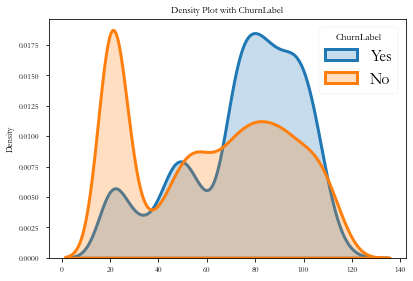

In [33]:
# Example: Look at Churn vs MonthCharges
plt.clf()
for label in ['Yes','No']:
    subset = data[data.ChurnLabel==label]
    
    # Draw the density plot
    sns.distplot(subset['MonthlyCharges'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3, 'shade':True},
                 label = label)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'ChurnLabel')
plt.title('Density Plot with ChurnLabel')
plt.xlabel('') # Monthly Charges
plt.ylabel('Density')
plt.show()

In [ ]:
# Additional Exploration